# Create a single image with shapes 

The shape module contain a number of geometric shapes. In this notebook, we will go over creating a instance of `Shapes` and how to generate shapes with and without noise, and display the results. 

In [1]:
import matplotlib.pyplot as plt

from deepbench.shapes import Shapes
from deepbench.image import ShapeImage
from deepbench.collection import Collection

# Noiseless Image 

The first example shows how to create multiple objects without noise added to the image. We'll look at a couple of different objects and their parameters. 

In [2]:
shapes = Shapes(image_shape=(28,28)) # Make an instance of the Shapes class 

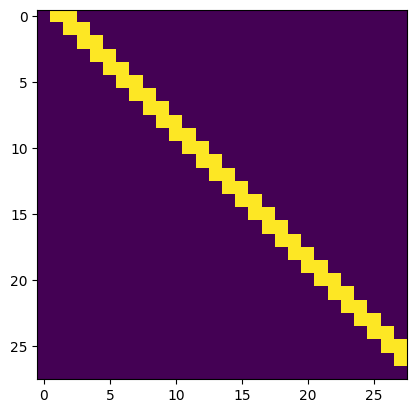

In [3]:
line = shapes.create_line() # Create a line using the random defaults

plt.imshow(line)
plt.show()

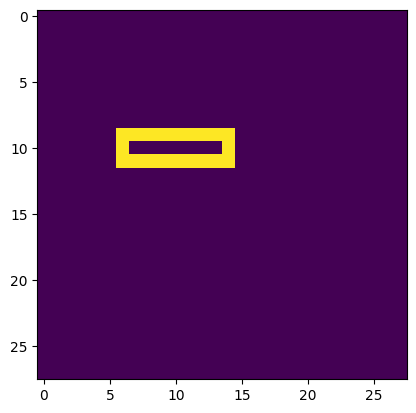

In [4]:
# Create a rectangle specifying the specific center and width/length

rectange = shapes.create_rectangle(
    center=(10,10), 
    width=2, 
    height=8)

plt.imshow(rectange)
plt.show()

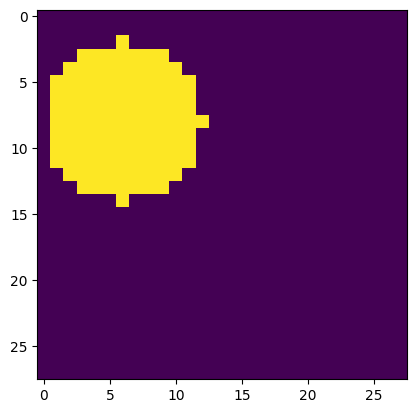

In [5]:
# Create a filled-in circle 
circle = shapes.create_ellipse(center=(8, 6), width=12, height=12, fill=True)
plt.imshow(circle)
plt.show()

# Noisy Image 

Now, we'll add noise to all those images using the `ShapeImage` class. 
The `ShapeImage` both combines shapes and adds noise to the image. 
You can make either single shape images, or add many together. 

In [6]:
shape_image = ShapeImage(
    image_shape=(28,28), 
    object_noise_level=0.2
    ) # Add .2 sigma of guassian noise 


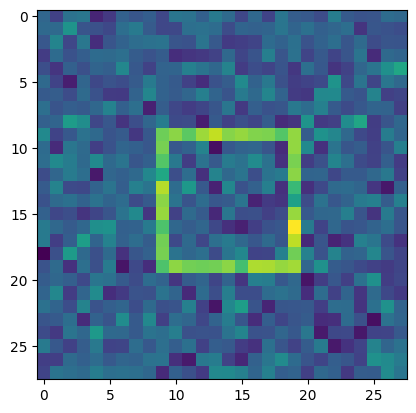

In [7]:
# A single rectangle in a noisy image
noisy_rectangle = shape_image.combine_objects(
    objects=["rectangle"], 
    instance_params={}, 
    object_params={} # Using all the default values
)
plt.imshow(noisy_rectangle)


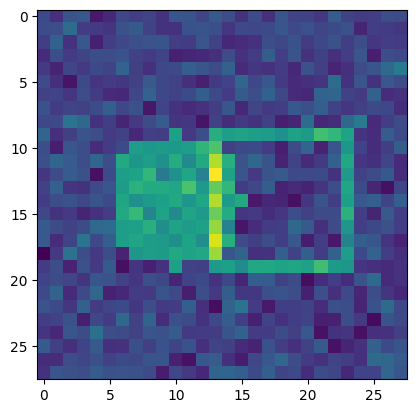

In [8]:
# An image with both noise and multiple shapes
 
noisy_rectange = shape_image.combine_objects(
    objects=["ellipse", "rectangle"], 
    instance_params=[{},{}], 
    object_params=[
        {"center":(14,10), "fill":True}, # The circle parameters
        {"center":(14,18)} # The rectangle parameters
    ]
)
plt.imshow(noisy_rectange)

## Using a collection 

If you want to do this same thing, but keep track of the parameters and the default values, we recommend you use a `Collection`.

This has a similar interface to the `Image` type objects, but work through initializing the `Collection` with the full parameters of your dataset. 

In [13]:
import numpy as np


shape_config = {
    "object_type": "shape", # Defines that this is a shape module
    "object_name": "ShapeImage", # Class used to generate the image

    "total_runs": 1,
    "image_parameters": {
        "image_shape": (28, 28),
        "object_noise_level": 0.2 # Collection noise level
    },
    "object_parameters": {
        "rectangle": { # First object in the image
            "object": {
                "width": np.random.default_rng().integers(2, 28),
                "height": np.random.default_rng().integers(2, 28),
                "fill": True
                       },
            "instance": {}
        },
        "arc":{ # Second object in the image
            "object": {
                "radius": np.random.default_rng().integers(2, 6),
                "theta1":np.random.default_rng().integers(0, 20),
                "theta2":np.random.default_rng().integers(60, 180)
            },
            "instance":{}
        }}
    }

In [10]:
shape_collection = Collection(object_config=shape_config) # initalize
shape_collection() # generate the images 


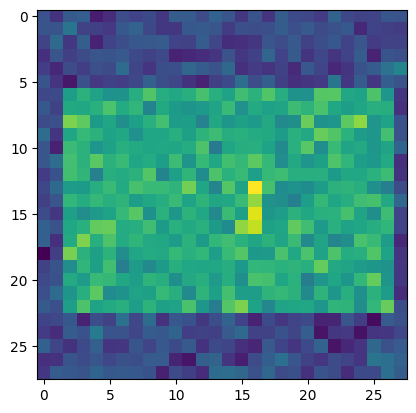

In [11]:
plt.imshow(shape_collection.objects[0]) # First and only image in the collection
plt.show()

In [12]:
shape_collection.object_params[0]

{'object_noise_type': 'gaussian',
 'object_noise_level': 0.2,
 'seed': 241557,
 'rectangle': {'object': {'width': 16, 'height': 24, 'fill': True},
  'instance': {}},
 'arc': {'object': {'radius': 3, 'theta1': 5, 'theta2': 129}, 'instance': {}},
 'image_shape': (28, 28)}